In [17]:
# 必要なモジュールのインポート
import matplotlib.pyplot as plt

from dataclasses import dataclass
from mimesis import Generic
from mimesis import Person as Personal
from mimesis.locales import Locale
from mimesis.providers.base import BaseProvider
from typing import Dict, Generator, List

In [2]:
# メソッドの確認
def view_methods(module) -> None:
    attrs = dir(module)
    
    print(f"List of methods of {module.__module__}")
    print("<method_name> : <method_type>")
    print()
    
    for method in attrs:
        # type(getattr(x, y) implies type(x.y)
        method_type = type(getattr(module, method))
        
        print(f"{method} : {method_type}")
    
    return

In [67]:
# 日本語バージョン
# locale = Locale.JA

# 英語バージョン
locale = Locale.EN

provider = Generic(locale=locale)

In [84]:
@dataclass
class Consumer(object):
    genre_preference: Dict[str, float]
    status: str
    motivation: float
    consume_type: str
    # can_view: int
    richness: float
    busyness: float


@dataclass
class Movie(object):
    genre: str
    target: str
    promo_cost: int
    bloadcast_day: int
    title: int = None

In [69]:
GENRES = [
    'documentary', 'horror', 'fantasy', 'anime', 
    'sf', 'comedy', 'drama', 'action_adventure',
]

In [70]:
TARGET = [
    'student', 'society', 'family'
]

In [71]:
CUSTOMER_TYPE_RATIO = {
        'initial_user': 0.16,
        'pre_user': 0.34,
        'after_user': 0.34,
        'late_user': 0.16,
    }

In [72]:
class Product(BaseProvider):
    def __init__(self, seed):
        super().__init__(seed=seed)
        
    def genre(self) -> str:
        return self.random.choice(GENRES)
    
    def target(self) -> str:
        return self.random.choice(TARGET)

In [73]:
class Person(Personal):
    def __init__(self, seed):
        super().__init__(seed=seed)
    
    def category(self) -> str:
        customer_types = list(CUSTOMER_TYPE_RATIO.keys())
        weights = CUSTOMER_TYPE_RATIO.values()
        
        customer_type = self.random.choices(customer_types, weights=weights)[0]
        
        return customer_type

In [74]:
provider.add_providers(
    Product,
    Person,
)

In [75]:
provider.person.name()

'Melissia'

In [76]:
provider.product.target()

'society'

In [77]:
MIN_COST = 1
MAX_COST = 100

In [98]:
def generate_consumers(n_consumers: int) -> Generator[Consumer, None, None]:
    consumer_type = provider.person.category
    richness = provider.finance.price
    status = provider.product.target
    random = provider.random
    
    for _ in range(n_consumers):
        kwargs = {
            'genre_preference': {genre: 10 for genre in GENRES},
            'status': status(),
            'motivation': random.uniform(0, 10, precision=1),
            'consume_type': consumer_type(),
            # 'can_view': ,
            'richness': richness(minimum=1, maximum=10),
            'busyness': random.uniform(0, 10, precision=1),
        }
       
        yield Consumer(**kwargs)
    

def generate_movies(n_movies: int, min_cost: int = MIN_COST, max_cost: int = MAX_COST) -> Generator[Movie, None, None]:
    genre = provider.product.genre
    target = provider.product.target
    price = provider.finance.price
    randint = provider.random.randint
    title = provider.text.title
    
    for _ in range(n_movies):
        kwargs = {
            'genre': genre(),
            'target': target(),
            # 宣伝費(単位：百万)は、1 以上 100 以下
            'promo_cost': int(price(minimum=min_cost, maximum=max_cost)),
            # 公開日は初日から最終日の100日前まで（今は400日間）
            'bloadcast_day': randint(0, 300),
            'title': title(),
        }
        
        yield Movie(**kwargs)

In [100]:
n_consumers = 500
consumers = list(generate_consumers(n_consumers))

# view information of consumers
# for consumer in consumers:
#     print(f"status: {consumer.status}, consume_type: {consumer.consume_type}")

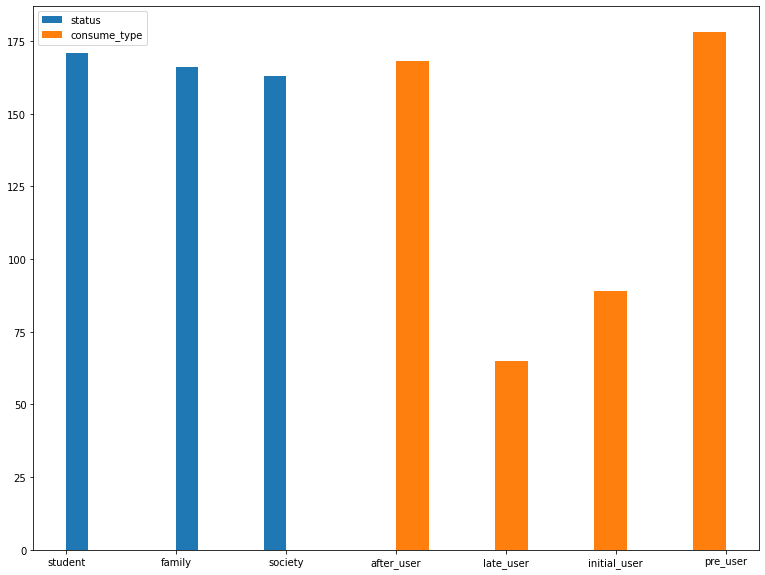

In [106]:
statuses = [consumer.status for consumer in consumers]
types = [consumer.consume_type for consumer in consumers]

plt.figure(figsize=(13, 10))
plt.hist(statuses, label='status')
plt.hist(types, label='consume_type')
plt.legend()
plt.show()

In [87]:
n_movies = 100
movies = list(generate_movies(n_movies))

# view information of moives
# for movie in movies:
#     print(f"genre: {movie.genre}, target: {movie.target}, bloadcast_day: {movie.bloadcast_day}")

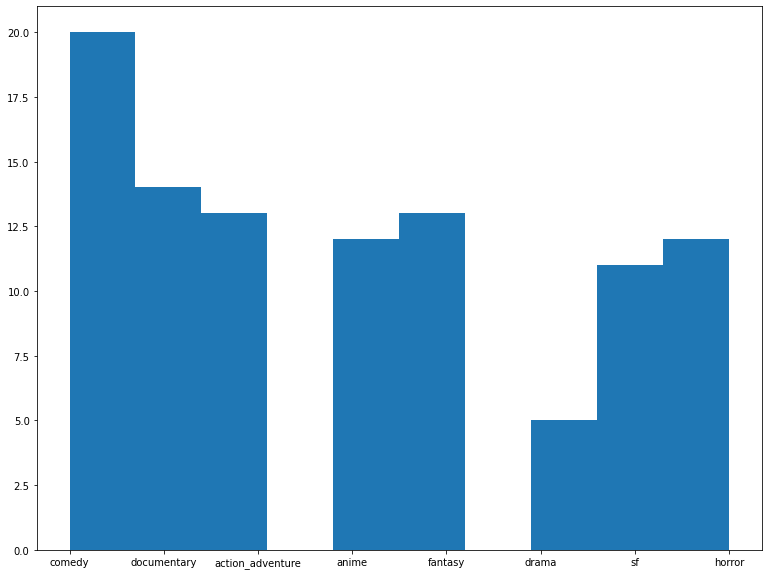

In [107]:
genres = [movie.genre for movie in movies]

plt.figure(figsize=(13, 10))
plt.hist(genres)
plt.show()

## **属性間の依存関係を踏まえると、ベイジアンネットワークによるダミーデータの生成も考えられる**
## **ベイジアンネットワークじゃなくても、依存関係を考慮したデータ生成器を開発するのもありかもしれない**

[ベイジアンネットワークの条件付きサンプリングの参考になるかもしれない](https://vigne-cla.com/24-3/)